In [3]:
#Question 1
#Convolution layers within CNN could provide a high-dimension features, 
#while a fully connected layer offers a cheap way to learn the features from convolution layers. 
#Fully connected layers could improve the ability of expressing the non-linearity of learning tasks.


In [ ]:
#Question 2
#It is known that both convolution kernels and pooling kernel do the regional works for data. 
#A convolution kernel is more likely to find out the pattern hidden in regions and then create a 
#-feature map that have the same size as input data. 
#While a pooling kernel always takes output from a convolution layer as input. 
#Pooling kernels could not only ‘summary’ the regional information, but also reduce the data size, 
#-which reduce the number of features(parameters) but not lose information of data. 


In [ ]:
#Question3
#A local response normalization layer is needed when one or more certain input of a convolution layer 
#-extremely larger than other inputs. 
#Since the large input would subdue other input. 
#For example, there are 5 inputs for a tanh activation function.
#4 of the inputs are smaller than 1, and the other one is 2. 
#Consequently, the other four inputs have no effect to this tanh activation since when summary of inputs larger than 1, 
#-this function becomes saturated and constantly be 1.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [3]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [4]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

In [5]:
np.random.seed(25)

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28))
('y_test original shape', (10000,))


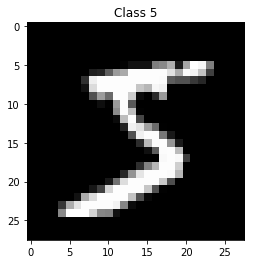

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [8]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [9]:
number_of_classes = 10
#Converts a class integer to binary matrix(one-hot)
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
#Example of to-categorical()
y_train[0], Y_train[0]

(5, array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]))

In [10]:
model = Sequential()

In [11]:
#Layer 1 
#Parameter: 3x3 kernel size and 32 kernels
#stride is defaulted to be 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))

In [12]:
#Layer 2
#Parameter: 3x3 kernel size, 32 kernels, 2x2 pooling
#Batch normalization layer, axis is a integer denote the axis or features that should be normalized
BatchNormalization(axis=-1)
#stride is defaulted to be 1
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
#Layer 3
BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
#Layer 4
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
model.add(Flatten())
# Fully connected layer

In [15]:
BatchNormalization()
# dense implement: output = activation(dot(input, kernel) + bias) 
# after first layer, you don't need to specify the size of the input anymore
model.add(Dense(512))#or model.add(Dense(512),activation='relu')
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [17]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [18]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
height_shift_range=0.08, zoom_range=0.08)

In [19]:
test_gen = ImageDataGenerator()

In [20]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [21]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

/Users/bingyangwen/anaconda2/envs/tensorflow/lib/python2.7/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 116s - loss: 0.1664 - acc: 0.9482 - val_loss: 0.0367 - val_acc: 0.9888


In [22]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 6s     
()
('Test accuracy: ', 0.98880000000000001)


In [23]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

 9952/10000 [============================>.] - ETA: 0s

In [24]:
# using fashion_Mnist
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4415488/4422102 [============================>.] - ETA: 0s

('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28))
('y_test original shape', (10000,))


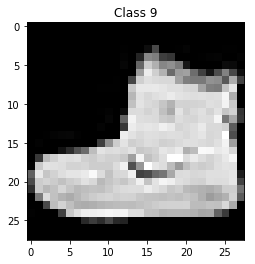

In [25]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [26]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [27]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(9, array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]))

In [28]:
#the model is same as the previous one 
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)
model.fit(X_train, Y_train, batch_size=128, nb_epoch=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 118s - loss: 0.4989 - acc: 0.8178 - val_loss: 0.3657 - val_acc: 0.8701


In [29]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
 validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 142s - loss: 0.4654 - acc: 0.8258 - val_loss: 0.3630 - val_acc: 0.8640
Epoch 2/5
937/937 [==============================] - 156s - loss: 0.3780 - acc: 0.8604 - val_loss: 0.3037 - val_acc: 0.8870
Epoch 3/5
937/937 [==============================] - 140s - loss: 0.3476 - acc: 0.8707 - val_loss: 0.2768 - val_acc: 0.9029
Epoch 4/5
937/937 [==============================] - 139s - loss: 0.3259 - acc: 0.8776 - val_loss: 0.2613 - val_acc: 0.9018
Epoch 5/5
937/937 [==============================] - 133s - loss: 0.3108 - acc: 0.8841 - val_loss: 0.2686 - val_acc: 0.9015


In [30]:
# accuracy for fashion_mnist
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])

10000/10000 [==============================] - 6s     
()
('Test accuracy: ', 0.90349999999999997)


In [31]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)



 9984/10000 [============================>.] - ETA: 0s